# Problem Set 5, due June 2nd at 3:30pm.

As usual, you are highly encouraged to start this problem set early.
There are a lot of components to this problem set, but I hope that
no single problem will take too much time. There are several
opportunities to earn extra credit in this problem set, and Part 3 is specified in a rather vague way, giving you considerable leeway in how to do your analysis.

# Part 1: Principal Component Analysis

Just when you thought you were finally done with the Boston Housing Prices Data Set, it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [2]:
# Pandas
import pandas as pd

# Math and Science
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind

# Ploting
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.mlab as mlab
import pydotplus 
from IPython.display import Image 

# ML and other relevants
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import KFold
import sklearn
import sklearn.cross_validation

# The data
from sklearn.datasets import load_boston
bdata = load_boston()

/home/kriarvi95/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1.1 Yet another scatterplot

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Then, just use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

/home/kriarvi95/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


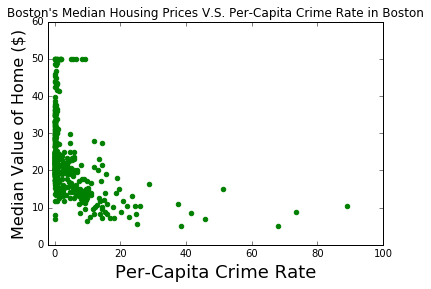

Correlation of Median Housing and Per-Capita Crime:  -0.385831689884

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     20.04
Date:                Mon, 29 May 2017   Prob (F-statistic):           1.04e-05
Time:                        10:36:16   Log-Likelihood:                -1533.2
No. Observations:                 333   AIC:                             3068.
Df Residuals:                     332   BIC:                             3072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

In [4]:
# 0: ...housekeeping:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]

# 1: Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).
pltX = boston['CRIM']
pltY = bdata.target
plt.scatter(pltX, pltY, color='g')
plt.title("Boston's Median Housing Prices V.S. Per-Capita Crime Rate in Boston")
plt.xlabel('Per-Capita Crime Rate', fontsize=18)
plt.ylabel('Median Value of Home ($)', fontsize=16)
plt.xlim(-2,100)
plt.legend()
plt.show()

print("Correlation of Median Housing and Per-Capita Crime: ", np.corrcoef(pltX,pltY)[1,0])

#2: Then, just use the Linear Regression class from sklearn or the OLS class from SciPy to regress median housing price on average number of rooms per house.
X_train, X_test, y_train, y_test = train_test_split(pltX, pltY, test_size=0.34, random_state=42)

linearModel = sm.OLS(y_train, X_train)
olsres = linearModel.fit()
trainPredictions = olsres.predict(X_train)
testPredictions = olsres.predict(X_test)

print()
print(olsres.summary())
print()

#3: Report the RMSE on the training and test set.
trainRMSE = mean_squared_error(y_train, trainPredictions)**0.5
print('Training RMSE: ', trainRMSE)
print()

testRMSE = mean_squared_error(y_test, testPredictions)**0.5
print('Testing RMSE: ', testRMSE)

## 1.2 Scatterplot matrices

Choose 8 out of the of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](https://learningomics.files.wordpress.com/2013/01/trees.png), just with 8 rows/8 columns.

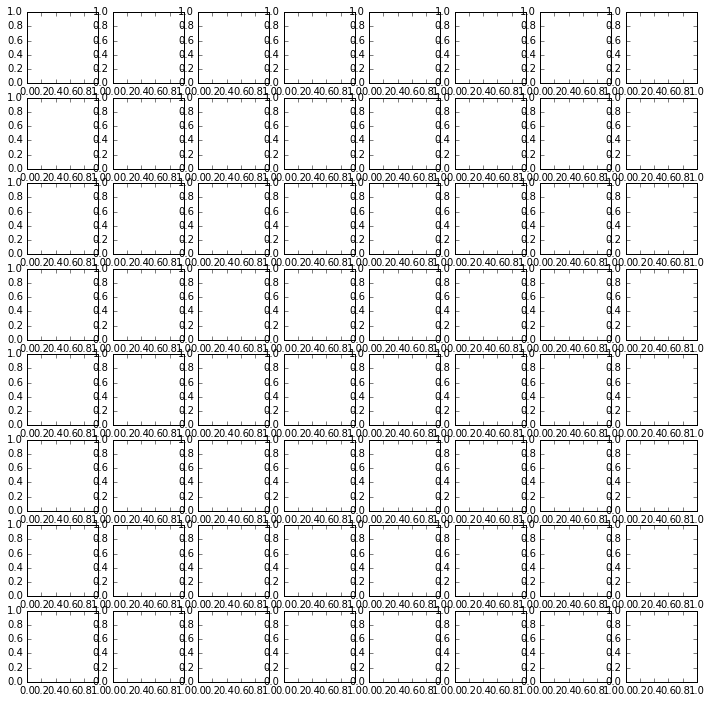

In [12]:
mostInteresting = ['CRIM', 'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'B']
plt.figure(figsize=(12,12))
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        # insert your code here

## 1.3 PCA to the rescue

Run principal component analysis (I expect you to use 'sklearn' but feel free to implement it youself ;-) to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

/home/kriarvi95/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


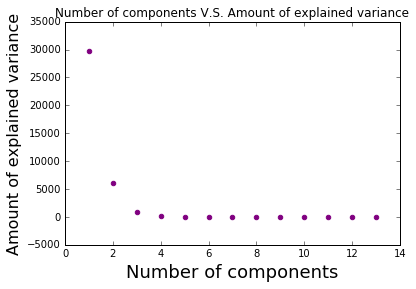

In [5]:
# 1: Run principal component analysis (I expect you to use 'sklearn' but feel free to implement it youself ;-) to find the first 12 principal components of your data. Use only your training set (66% of the data), and use all features except the median housing price. 
PCAX_train, PCAX_test, PCAy_train, PCAy_test = train_test_split(boston, pltY, test_size=0.34, random_state=42)

forPCA = PCAX_train
#forPCA = forPCA.drop('LSTAT', axis=1)
forPCA = forPCA.as_matrix()

pca = decomposition.PCA()
pcaModel = pca.fit(forPCA)

#2: Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.
pltPCAx = np.linspace(1, 13, 13).astype(int)
pltPCAy = pca.explained_variance_

plt.scatter(pltPCAx, pltPCAy, color='purple')
plt.title("Number of components V.S. Amount of explained variance")
plt.xlabel('Number of components', fontsize=18)
plt.ylabel('Amount of explained variance', fontsize=16)
plt.legend()
plt.show()

## 1.4 Visualizing the components

Create a $1\times 3$ grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

In [11]:
# Enter your code here
pca.n_components = 1
pcaOne = pca.fit_transform(forPCA)

pca.n_components = 2
pcaTwo = pca.fit_transform(forPCA)


# plt.scatter(pcaOne, pcaTwo, color='red')
# plt.title("PCA 1 V.S. PCA 2")
# plt.xlabel('PCA 1', fontsize=18)
# plt.ylabel('PCA 2', fontsize=16)
# plt.legend()
# plt.show()

# plt.scatter(pcaOne, pltY, color='red')
# plt.title("PCA 1 V.S. PCA 2")
# plt.xlabel('PCA 1', fontsize=18)
# plt.ylabel('PCA 2', fontsize=16)
# plt.legend()
# plt.show()

# plt.scatter(pcaTwo, pltY, color='red')
# plt.title("PCA 1 V.S. PCA 2")
# plt.xlabel('PCA 1', fontsize=18)
# plt.ylabel('PCA 2', fontsize=16)
# plt.legend()
# plt.show()

666

## 1.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 1.1?  Interpret your results!

In [15]:
#1: Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace... 

#2: Now, using your training data, fit a regression of median housing price on this first principal component of your data.

#3: Report the RMSE of this regression for both the training and test set.

*Enter your observations here*

# Part 2: Trees and Forests

You should use the [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) libraries in sklearn for this problem.

## 2.1 Binary features, binary outcome

Convert a few of the continuous variables to binary indicators: Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000 (or whatever other value you find interesting).  Create a new binary variable _HIGH\_CRIME_, which is 1 iff CRIM>10. Create another new binary variable BIG which is 1 iff RM>6.

Using 10-fold cross-validation, use _DecisionTreeClassifier_ in 'sklearn' to fit a decision tree that predicts _EXPENSIVE_ based on the values of _HIGH\_CRIME_, BIG, and CHAS. Report the average training and testing accuracy across your 10 folds, and show a diagram of the tree (at least the first three levels).

In [16]:
from sklearn import tree as tree
# 1: Convert a few of the continuous variables to binary indicators
decisionTreeDF = boston
decisionTreeDF['MEDV'] = bdata.target

decisionTreeDF['EXPENSIVE'] = np.nan
decisionTreeDF.loc[decisionTreeDF['MEDV'] > 40.0, 'EXPENSIVE'] = 1
decisionTreeDF.loc[decisionTreeDF['MEDV'] <= 40.0, 'EXPENSIVE'] = 0


decisionTreeDF['_HIGH_CRIME_'] = np.nan
decisionTreeDF.loc[decisionTreeDF['CRIM'] > 10, '_HIGH_CRIME_'] = 1
decisionTreeDF.loc[decisionTreeDF['CRIM'] <= 10, '_HIGH_CRIME_'] = 0

decisionTreeDF['BIG'] = np.nan
decisionTreeDF.loc[decisionTreeDF['RM'] > 6, 'BIG'] = 1
decisionTreeDF.loc[decisionTreeDF['RM'] <= 6, 'BIG'] = 0

#2: Using 10-fold cross-validation, use DecisionTreeClassifier in 'sklearn' to fit a decision tree that predicts EXPENSIVE based on the values of _HIGH_CRIME_, BIG, and CHAS. 
kf = KFold(n_splits=10)
XTree = decisionTreeDF[['_HIGH_CRIME_', 'BIG', 'CHAS']].values

trainRMSEs = []
testRMSEs = []
for trainTree_index, testTree_index in kf.split(XTree):
    XTree_train, XTree_test = XTree[trainTree_index], XTree[testTree_index]
    yTree_train, yTree_test = decisionTreeDF['EXPENSIVE'][trainTree_index], decisionTreeDF['EXPENSIVE'][testTree_index]
    
    clf = tree.DecisionTreeClassifier(max_depth=4, random_state=None)
    output = clf.fit(XTree_train, yTree_train)
    
    trainTreePredictions = output.predict(XTree_train)
    testTreePredictions = output.predict(XTree_test)
    
    aTrainRMSE = mean_squared_error(yTree_train, trainTreePredictions)
    aTestRMSE = mean_squared_error(yTree_test, testTreePredictions)
    trainRMSEs.append(aTrainRMSE)
    testRMSEs.append(aTestRMSE)
    
#3: Report the average training and testing accuracy across your 10 folds, and show a diagram of the tree (at least the first three levels).
print('AVERAGE TRAIN RMSE: ', np.mean(trainRMSEs))
print('AVERAGE TEST  RMSE: ', np.mean(testRMSEs))
print()

#4: Show a diagram of the tree (at least the first three levels)

#dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['_HIGH_CRIME_', 'BIG', 'CHAS'], class_names=['EXPENSIVE'], filled=True, rounded=True, special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png())  

AVERAGE TRAIN RMSE:  0.0612613263929
AVERAGE TEST  RMSE:  0.0609803921569



*Enter your observations here*


## 2.2 Tree diagram

Use all of the data to re-fit a single decision tree with max_depth = 4 (i.e., no cross-validation). Then, use the built-in sklearn libraries to create a diagram of the tree itself. Interpret what you see.

In [17]:
#1: Re-fit a single decision tree with max_depth = 4
allXTree = decisionTreeDF
allXTree = allXTree.drop('MEDV', axis=1)
allXTree = allXTree.drop('EXPENSIVE', axis=1)
yTree = decisionTreeDF['EXPENSIVE']

allDataOutput = clf.fit(allXTree, yTree)

#2: Create a diagram of the tree itself.


*Enter your observations here*

## Extra Credit: Sensitivity analysis
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of _max\_depth_ and _min\_samples\_leaf_ affects test accuracy. To do this, create a 3-D plot where the x-axis is _max\_depth_, the y-axis is _min\_samples\_leaf_, and the z-axis shows accuracy. What combination of _max\_depth_ and _min\_samples__leaf_ achieves the highest accuracy?

In [18]:
# Enter your code here

*Enter your observations here*

## 2.3 Regression Trees
Use the _DecisionTreeRegressor_ in 'sklearn' to predict median housing value based on your favorite set of covariates. Report the average 10-fold cross-validated RMSE, separately for the training data and for the testing data. 

How do your RMSE values compare to those you obtained using nearest neighbors, and (regularized) linear regression?

In [32]:
#1: Predict median housing value based on your favorite set of covariates.
XTreeRegresion = decisionTreeDF[['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT', '_HIGH_CRIME_', 'BIG', 'CHAS']].values

trainRegRMSEs = []
testRegRMSEs = []
for trainTree_index, testTree_index in kf.split(XTreeRegresion):
    XTreeRegresion_train, XTreeRegresion_test = XTreeRegresion[trainTree_index], XTreeRegresion[testTree_index]
    yTreeRegresion_train, yTreeRegresion_test = decisionTreeDF['EXPENSIVE'][trainTree_index], decisionTreeDF['EXPENSIVE'][testTree_index]
    
    regressor = tree.DecisionTreeRegressor(random_state=0)
    regOutput = regressor.fit(XTreeRegresion_train,  yTreeRegresion_train)
    
    trainTreeRegPredictions = regOutput.predict(XTreeRegresion_train)
    testTreeRegPredictions = regOutput.predict(XTreeRegresion_test)
    
    aTrainRegRMSE = mean_squared_error(yTreeRegresion_train, trainTreeRegPredictions)
    aTestRegRMSE = mean_squared_error(yTreeRegresion_test, testTreeRegPredictions)
    trainRegRMSEs.append(aTrainRegRMSE)
    testRegRMSEs.append(aTestRegRMSE)
    
#2:  Report the average 10-fold cross-validated RMSE, separately for the training data and for the testing data.
print('AVERAGE TRAIN RMSE: ', np.mean(trainRegRMSEs))
print('AVERAGE TEST  RMSE: ', np.mean(testRegRMSEs))

AVERAGE TRAIN RMSE:  0.0
AVERAGE TEST  RMSE:  0.0550588235294


In [48]:
print(testTreeRegPredictions.reshape(1,-1))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


*Enter your observations here*

## 2.4 Build your own random forest
Using your model from 2.1, build a forest of 100 trees. Do this manually, i.e., don't rely on existing packages.

To accomplish this, first split your data into 10 folds for cross validation. For each fold, take the training data and use bootstrap resampling of your original data to construct 100 new training datasets (each one should be slightly different!). Then, using your optimal values of _max\_depth_ and _min\_samples\_leaf_ from earlier, fit a separate decision tree to each sample. Classify each of your test instances as the class chosen by the majority of the 100 trees. Repeat this process for each of your 10 folds.

Hint: Consult Daume Ch 1, Witten et al, ch 4.3

What is the cross-validated accuracy of your random forest classifier? How does it compare to the results from 2.1? Is this what you expected? Why or why not?

In [35]:
#1: build a forest of 100 trees. Do this manually, i.e., don't rely on existing packages.
allXTreeVals = allXTree.values
for trainForest_index, testForest_index in kf.split(allXTreeVals):
    XForest_train, XForest_test = allXTreeVals[trainForest_index], allXTreeVals[testForest_index]
    yForest_train, yForest_test = decisionTreeDF['EXPENSIVE'][trainForest_index], decisionTreeDF['EXPENSIVE'][testForest_index]
    
    bs = cross_validation.Bootstrap(boston['MEDV'].size, n_bootstraps=100, n_train=XForest_train.size, n_test=XForest_test.size, random_state=0)
    
    perHundred = []
    for trainBS_index, testBS_index in bs:
        XBS_train, XBS_test = allXTreeVals[trainBS_index], allXTreeVals[testBS_index]
        
        
        forestCLF = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=None)
        forestOutput = forestCLF.fit(XBS_train, yForest_train)
        testTreePredictions = forestOutput.predict(XBS_test)
        perHundred.append(testTreePredictions)
        
        #Classify each of your test instances as the class chosen by the majority of the 100 trees. 


def find_majority(k):
    myMap = {}
    maximum = ( '', 0 ) # (occurring element, occurrences)
    for n in k:
        if n in myMap: myMap[n] += 1
        else: myMap[n] = 1

        # Keep track of maximum on the go
        if myMap[n] > maximum[1]: maximum = (n,myMap[n])

    return maximum
#2: What is the cross-validated accuracy of your random forest classifier?

NameError: name 'cross_validation' is not defined

*Enter your observations here*

## Extra Credit: Implement a Decision Tree in Python

For extra credit, put away the canned algorithm from sklearn, and write your own decision tree algorithm. Use the simple recursive algorithm we described in class, and train it on the boston housing prices data. Use the target variable  EXPENSIVE, and the following three binary input variables: CHAS, HIGH_CRIME, BIG.

Do not worry about implementing bells and whistles. However, you will definitely need the following:
 * A "BuildTree" function that implements the recursive algorithm
 * A function to calculate information gain
 
For this problem, you can consult Daume _A Course in Machine Learning_ how to do this. However, you must make your code your own - do not plagiarize the examples of other peoples. Implement the minimum required code to build a decision tree.

In [ ]:
# Enter your code here

# Part 3: Putting together the pieces

At this point, you have learned the nuts and bolts of a large number of machine learning algorithms. This includes: 
* Nearest Neighbor
* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* LASSO / Ridge Regression
* Naive Bayes
* Decision Trees
* Regression Trees
* Random Forests
* Neural Networks

Your mission now is to use your knowledge of supervised machine learning to try an predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll want at least the train and test data, maybe more.  Note that the version on Kaggle includes more variables than the one we used in the lab, so I recommend you to download once again.

## 3.1 Exploratory data analysis

Create a few figures and tables that help give you a feel for the data.

In [20]:
# Enter your code here
titanicTrain = pd.read_csv('train.csv')

titanicTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


/home/kriarvi95/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


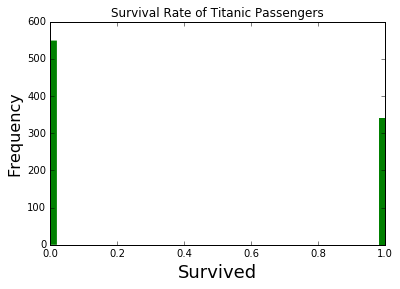

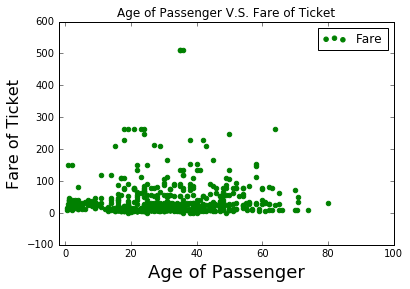

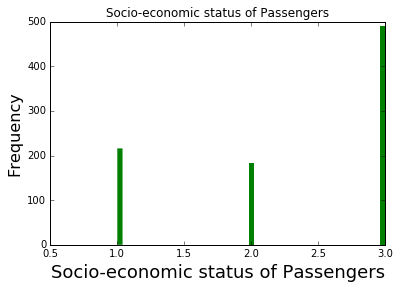

In [46]:
#EDA 1: Histogram
plt.hist(titanicTrain['Survived'], color = 'g', edgecolor = "none", bins=51)
plt.title("Survival Rate of Titanic Passengers")
plt.xlabel('Survived', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.show()

print()
print()

#EDA 2: Scatter Plot
plt.scatter(titanicTrain['Age'], titanicTrain['Fare'], color='g')
plt.title("Age of Passenger V.S. Fare of Ticket")
plt.xlabel('Age of Passenger', fontsize=18)
plt.ylabel('Fare of Ticket', fontsize=16)
plt.xlim(-2,100)
plt.legend()
plt.show()

print()
print()

#EDA 3: Histogram
plt.hist(titanicTrain['Pclass'], color = 'g', edgecolor = "none", bins=51)
plt.title("Socio-economic status of Passengers")
plt.xlabel('Socio-economic status of Passengers', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.show()

print()
print()

SNot = titanicTrain[(titanicTrain['Embarked'] == 'S') & (titanicTrain['Survived'] == 0)]
S = titanicTrain[(titanicTrain['Embarked'] == 'S') & (titanicTrain['Survived'] == 1)]
STotal = titanicTrain[(titanicTrain['Embarked'] == 'S')]

QNot = titanicTrain[(titanicTrain['Embarked'] == 'Q') & (titanicTrain['Survived'] == 0)]
Q = titanicTrain[(titanicTrain['Embarked'] == 'Q') & (titanicTrain['Survived'] == 1)]
QTotal = titanicTrain[(titanicTrain['Embarked'] == 'Q')]

CNot = titanicTrain[(titanicTrain['Embarked'] == 'C') & (titanicTrain['Survived'] == 0)]
C = titanicTrain[(titanicTrain['Embarked'] == 'C') & (titanicTrain['Survived'] == 1)]
CTotal = titanicTrain[(titanicTrain['Embarked'] == 'C')]

*Enter your observations here*

## 3.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. What do you conclude?

In [ ]:
# Enter your code here

*Enter your observations here*

## 3.3 Predict survival

Use 2-3 different machine learning algorithms to predict who will survive the titanic. Use whatever variables you like, but make sure to understand what you are doing, i.e., don't blindly use a variable without understanding what it signifies, how it is coded (e.g., should a categorical variable be converted into a set of fixed effects?), whether it is missing observations, and so forth. Feel free to use built-in libraries, but make sure to cross-validate your model (on the training set!), and then report the test accuracy. How effectively can you predict survival, and what model works best?

In [ ]:
# Enter your code here

*Enter your observations here*

## Extra Credit: Develop an ensemble

Create an ensemble learner by hand. Using all of the training data, fit as many different machine learning algorithms as you can. Then, to classify each instance in the test data, take the majority vote of all of your different fitted models. How accurately do you predict survival? How does this compare to your earlier results? 

Hint: Consult Daume Ch 11.

*Note:* It will make your life easier if you use an odd number of algorithms!

In [ ]:
# Enter your code here

*Enter your observations here*